<a href="https://colab.research.google.com/github/ekanshsinghrathore/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Closing Price Prediction**


# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **Stock Price** = Every publicly-traded company, when its shares are issued, is given a price – an assignment of their value that ideally reflects the value of the company itself. The price of a stock will go up and down in relation to a number of different factors, including changes within the economy as a whole, changes within industries, political events, war, and environmental changes.









# **Open** = An opening price is the price of a security when it is first available to be exchanged (which occurs as soon as the exchange it’s on opens).


*   It is a good indicator for people interested in making short-term trades, as a security’s opening price can help determine trading activity for the day.
*   In addition, it is a useful tool to measure swings in value for securities that have significant intra-day gains and losses.

*   A security’s opening price will not always be the same as its closing price, this can be due to after-hours trading or changes in investor valuations.


# **High** = Today's high is the highest price at which a stock traded during the course of the trading day and is typically higher than the closing or equal to the opening price. It may be used when calculating a moving average.

# **Low** = Today's low is the lowest price that a stock trades in that day.

# **Close** = he closing price is the last price at which a security traded during the regular trading day. A security's closing price is the standard benchmark used by investors to track its performance over time.

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# calling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [73]:
# loading dataset with a 
df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [74]:
# checking dataset
df.head(20)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [75]:
# checking rows and columns in dataset
df.shape

(185, 5)

In [76]:
# checking null values in a dataset
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [77]:
# checking the range of dataframes for checking whether it needs normalisation or not.
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [78]:
# function to change month short name to full name in dataframe
def changedate(date):
  
  date_dict={'Jan':'January','Feb':'Feburary','Mar':'March','Apr':'April','May':'May','Jun':'June','Jul':'July','Aug':'August','Sep':'September','Oct':'October','Nov':'November','Dec':'December'}
  x=date[:-3]
  y=date_dict.get(x)
  return y


In [79]:
# function to change year to full digit form in dataframe
def yearfullform(date):
  if date[-2]=='0':
      index= -2
      final_string = date[:index] + '20' + date[index:]
      return final_string[-4:]
  elif date[-2]=='1':
      index= -2
      final_string = date[:index] + '20' + date[index:]
      return final_string[-4:]
  elif date[-2]=='2':
      index= -2
      final_string = date[:index] + '20' + date[index:]
      return final_string[-4:]

In [80]:
# Making new column Year in dataset
df["Year"] = df["Date"].apply(lambda x: yearfullform(x))

In [81]:
# Making new column Month in dataset
df["Month"] = df["Date"].apply(lambda x: changedate(x))

In [82]:
# Dropping date column in dataset becouse we already converted it to two different columns month and year
df.drop('Date', inplace=True, axis=1)

In [83]:
df.head(10)

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,July
1,12.58,14.88,12.55,13.42,2005,August
2,13.48,14.87,12.27,13.30,2005,September
3,13.20,14.47,12.40,12.99,2005,October
4,13.35,13.88,12.88,13.41,2005,November
5,13.49,14.44,13.00,13.71,2005,December
6,13.68,17.16,13.58,15.33,2006,January
7,15.50,16.97,15.40,16.12,2006,Feburary
8,16.20,20.95,16.02,20.08,2006,March
9,20.56,20.80,18.02,19.49,2006,April


In [84]:
mean_of_close=df.groupby('Month')['Close'].mean()

In [85]:
mean_of_close

Month
April        114.450000
August       103.386875
December     100.724000
Feburary     107.760667
January      108.774667
July         108.322500
June         109.661333
March        113.014000
May          112.874667
November      94.671250
October       97.399375
September     93.343750
Name: Close, dtype: float64

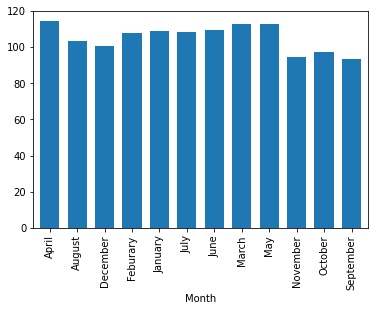

In [86]:
mean_of_close.plot.bar(width=0.7)
plt.show()

In [87]:
df.head()

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,July
1,12.58,14.88,12.55,13.42,2005,August
2,13.48,14.87,12.27,13.30,2005,September
3,13.20,14.47,12.40,12.99,2005,October
4,13.35,13.88,12.88,13.41,2005,November


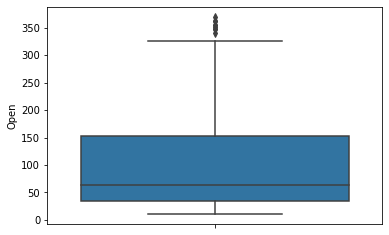

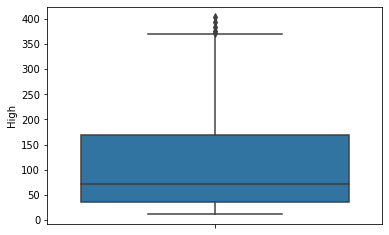

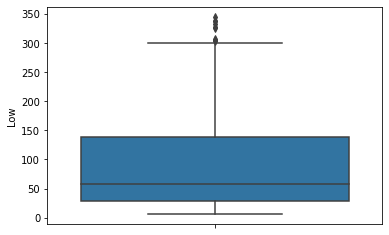

In [114]:
df_column_list=['Open','High','Low']
for a in df_column_list:
  open_box_plot=sns.boxplot(y =a, data = df)
  open_box_plot.set_xticklabels(open_box_plot.get_xticklabels(),rotation=30)
  plt.show()

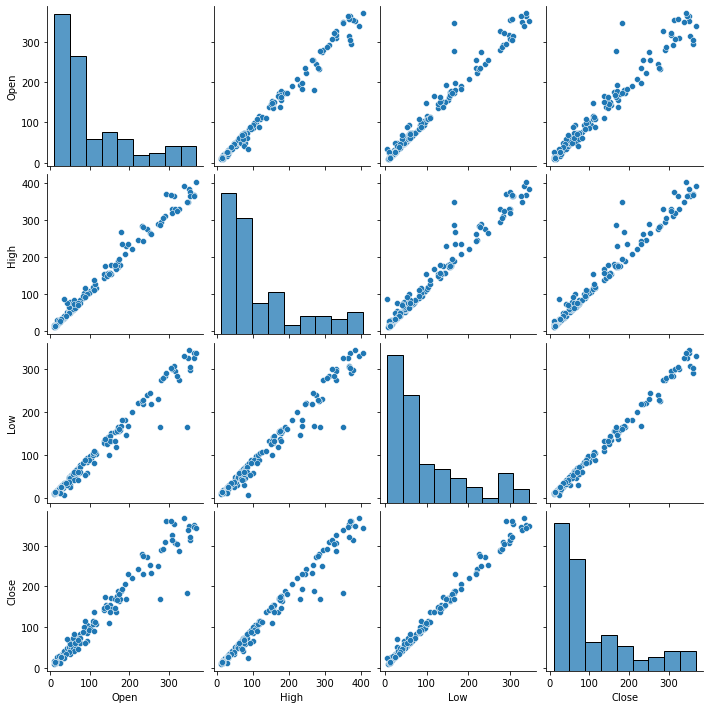

In [113]:
sns.pairplot(df[['Open','High','Low','Close']])

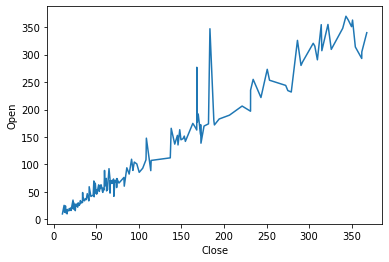

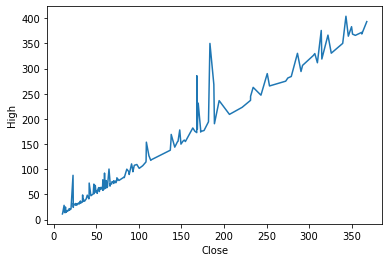

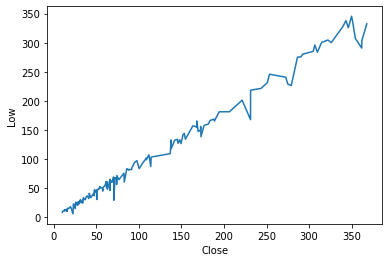

In [116]:
for a in df_column_list:
    sns.lineplot(x='Close', y=a, data=df)
    plt.show()